In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as np
import re

%matplotlib inline

In [8]:
def parse_runtimes(filename):
    
    op_timer = r'.* (.*) took (.*)ms'
    
    op_map = {'Total':0}
    
    def base_op(op_name):
        base_op_name = op_name.split('_', 1)[0]
        base_op_name = base_op_name.split('\t',1)[1]
        return base_op_name
    
    with open(filename) as f:
        lines = [line.strip() for line in f.readlines()]
        for line in lines:
            if re.match(op_timer, line):
                match = re.match(op_timer, line)
                op = match.groups()[0]
                time_ms = int(match.groups()[1])
                time_s = time_ms / 1000.
                base_op_name = base_op(op)
                if base_op_name in op_map:
                    op_map[base_op_name] += time_s
                else: 
                    op_map[base_op_name] = time_s
                op_map['Total'] += time_s
                  
    return op_map

def plot_op_map(op_map, filename=None):
    sorted_ops = sorted(op_map.items(), key=lambda kv: kv[1])
    print('sorted_ops',sorted_ops)
    
    times = [op[1] for op in sorted_ops]
    ops = [op[0] for op in sorted_ops]
    x_coords = range(len(ops))
    
    plt.bar(x_coords, times, align='center', alpha=0.5)
    plt.xticks(x_coords, ops, rotation=45)
    plt.ylabel('Time (s)')
    plt.title('MobileNetV2 runtime by op')
    
    if filename is not None:
        plt.savefig(filename)
    plt.show()

sorted_ops [('Minimum', 0.14000000000000004), ('Concat', 0.16800000000000004), ('Constant', 0.269), ('AvgPool', 2.658), ('Result', 5.625), ('Add', 8.776), ('Multiply', 9.983000000000002), ('Convolution', 333.3299999999959), ('Relu', 382.87100000000004), ('Total', 743.8199999999896)]


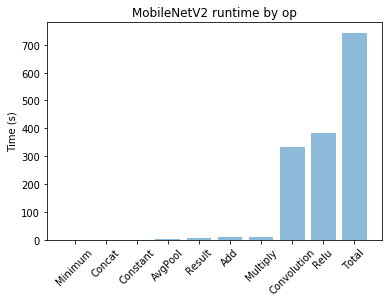

In [9]:
op_map = parse_runtimes('./runtime/765s.txt')
plot_op_map(op_map, 'client_765s.png')

sorted_ops [('Concat', 0.16100000000000006), ('Minimum', 0.1690000000000001), ('Constant', 1.1039999999999999), ('AvgPool', 2.666), ('Result', 5.552), ('Add', 8.758000000000001), ('Multiply', 10.138000000000002), ('Relu', 129.58800000000002), ('Convolution', 341.07500000000715), ('Total', 499.21100000000376)]


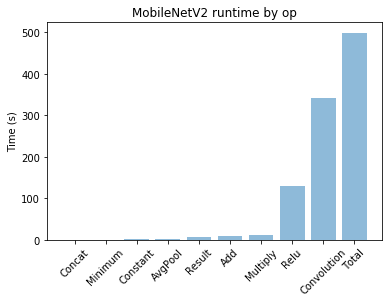

In [10]:
op_map = parse_runtimes('./runtime/clientless_501s.txt')
plot_op_map(op_map, 'clientless_500s.png')